<a href="https://colab.research.google.com/github/PalomiBollapalli/ADM-LAB/blob/main/lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
np.random.seed(42)
X = np.linspace(0, 10, 50).reshape(-1, 1)
y = 2 + 3 * X - 0.5 * X**2 + np.random.normal(0, 1, X.shape)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.7975730078536047


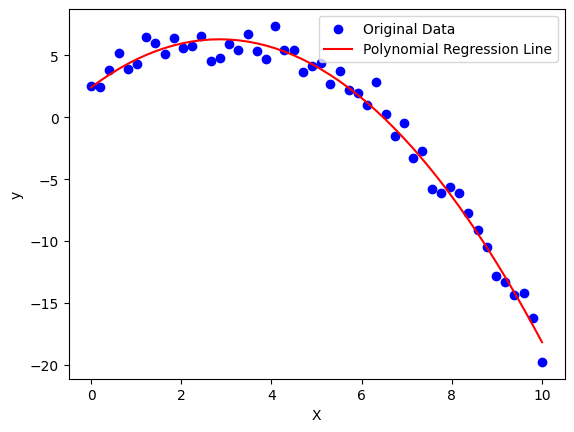

In [8]:
plt.scatter(X, y, color='blue', label="Original Data")
plt.plot(X, y_pred, color='red', label="Polynomial Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

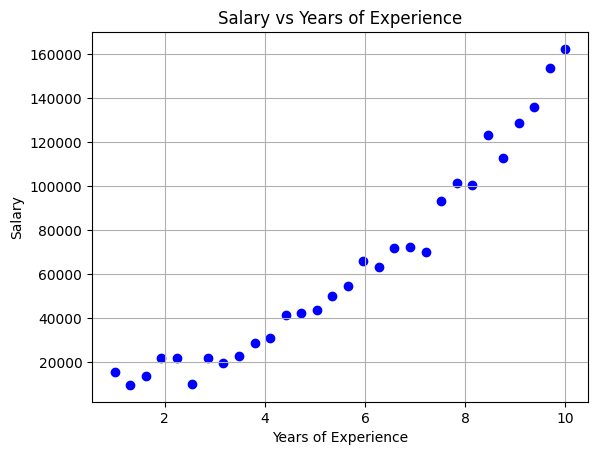

Mean Squared Error (MSE): 24743479.68
R² Score: 0.9877


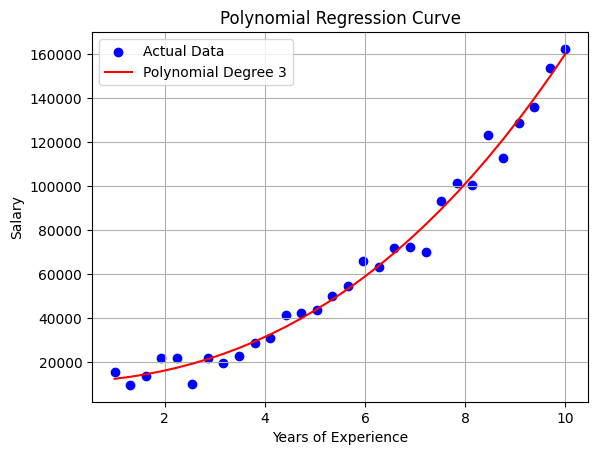

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
try:
    data = pd.read_csv('Salary_Data.csv')
except FileNotFoundError:
    # Create synthetic data
    np.random.seed(0)
    X = np.linspace(1, 10, 30)
    y = 5000 + (X ** 2) * 1500 + np.random.normal(0, 5000, size=X.shape[0])
    data = pd.DataFrame({'YearsExperience': X, 'Salary': y})
plt.scatter(data['YearsExperience'], data['Salary'], color='blue')
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()
X = data[['YearsExperience']].values
y = data['Salary'].values
degree = 3
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")
plt.scatter(X, y, color='blue', label='Actual Data')
X_sorted = np.sort(X, axis=0)
X_sorted_poly = poly.transform(X_sorted)
plt.plot(X_sorted, model.predict(X_sorted_poly), color='red', label=f'Polynomial Degree {degree}')
plt.title('Polynomial Regression Curve')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()